<a href="https://colab.research.google.com/github/Priyabrat845/Topic-Modeling-on-News-Articles/blob/main/Topic_modeling_of_news_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

## **Libraries**

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import glob

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

#pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
!pip install spacy
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.1MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp37-none-any.whl size=98051304 sha256=56511fa23ed954fa0148b7d595ff8585e55438b384bf4728f81f478e4c79af87
  Stored in directory: /tmp/pip-ephem-wheel-cache-vnwwwt2p/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [1]:
!pip install pyLDAvis==3.2.1

     |████████████████████████████████| 1.7MB 5.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136187 sha256=afae8be246c1c5c3487130ab2a0d9a3d6ba30fc1b16c4a11c5b432f66c0bc751
  Stored in directory: /root/.cache/pip/wheels/2f/cc/af/144c01e23fff8c11ef26e2fa161d98b7c2ae8c9a4f5cc48c2e
Successfully built pyLDAvis


## **Import Data**

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path ="/content/drive/MyDrive/Almabetter/bbc"

In [6]:
#Importing text file paths
business = glob.glob(path+'/business/*')
entertainment = glob.glob(path+'/entertainment/*')
politics = glob.glob(path+'/politics/*')
sports = glob.glob(path+'/sport/*')
tech = glob.glob(path+'/tech/*')

In [7]:
business[0:5]

['/content/drive/MyDrive/Almabetter/bbc/business/003.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/001.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/002.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/024.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/004.txt']

In [9]:
sports_text=[]

  for i in range(len(sports)):
    f=open(sports[i],errors='ignore')
    a=f.read()
    sports_text.append(a)

  print('List ended !!')


In [ ]:
sports_text[0]

'Dibaba breaks 5,000m world record\n\nEthiopia\'s Tirunesh Dibaba set a new world record in winning the women\'s 5,000m at the Boston Indoor Games.\n\nDibaba won in 14 minutes 32.93 seconds to erase the previous world indoor mark of 14:39.29 set by another Ethiopian, Berhane Adera, in Stuttgart last year. But compatriot Kenenisa Bekele\'s record hopes were dashed when he miscounted his laps in the men\'s 3,000m and staged his sprint finish a lap too soon. Ireland\'s Alistair Cragg won in 7:39.89 as Bekele battled to second in 7:41.42. "I didn\'t want to sit back and get out-kicked," said Cragg. "So I kept on the pace. The plan was to go with 500m to go no matter what, but when Bekele made the mistake that was it. The race was mine." Sweden\'s Carolina Kluft, the Olympic heptathlon champion, and Slovenia\'s Jolanda Ceplak had winning performances, too. Kluft took the long jump at 6.63m, while Ceplak easily won the women\'s 800m in 2:01.52.\n'

In [10]:
len(sports_text)

511

In [11]:
# Making the data lists for different topics.
def make_list(data):
    list = []
    for i in range(len(data)):
      file = open(data[i],'r')
      list.append(file.read())
    return(list)

In [13]:
business_texts= make_list(business)
entertainment_text = make_list(entertainment)
politics_texts= make_list(politics)
#sport_texts= make_list(sports)
tech_text = make_list(tech)

In [14]:
#Number of documents in every topics
print(len(business_texts),len(entertainment_text),len(politics_texts),len(sports_text),len(tech_text))

510 386 417 511 401


In [15]:
# Combine the topics.
complete_text = business_texts + entertainment_text + politics_texts + sports_text + tech_text

In [16]:
len(complete_text)

2225

From the above we can see that, the length of the complete text is 2225.

In [17]:
!pip install -U pandas-profiling

     |████████████████████████████████| 256kB 5.2MB/s 
     |████████████████████████████████| 10.1MB 39.9MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 1.1MB 43.4MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 112kB 53.3MB/s 
     |████████████████████████████████| 3.1MB 24.4MB/s 
     |████████████████████████████████| 645kB 42.3MB/s 
     |████████████████████████████████| 296kB 34.3MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=66892c3ca0ea2973eafbd80ad49eed5ae037c89c76748881a7e1b29ce2dd956f
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=55b91d5d38042a2a9946f7a06875f0a441a90c20987737144b7079411b72adaa
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d856

In [18]:
# Make the dataframe of texts.
data = pd.DataFrame({'Texts': complete_text})
#data.head()

In [ ]:
len(data)

2225

In [ ]:
data.head(5)

,Texts
0,Yukos unit buyer faces loan claim\n\nThe owner...
1,Ad sales boost Time Warner profit\n\nQuarterly...
2,Dollar gains on Greenspan speech\n\nThe dollar...
3,US trade gap hits record in 2004\n\nThe gap be...
4,High fuel prices hit BA's profits\n\nBritish A...


In [19]:
# Import the English stopwords.
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## **Data Cleaning**

In [20]:
# Removal of "\n"
# Converting the words to the lowercase.
# Removal of stopword.

def text_processing(data):
  data = data.map(lambda x: x.replace('\n',' '))
  data = data.map(lambda x: x.lower())
  #data = data.map(lambda x: ''.join([i for i in x if i not in string.punctuation]))
  data = data.map(lambda x: ' '.join([i for i in x.split(' ') if i not in stopwords.words('english')]))
  return data

In [21]:
data['Texts']= text_processing(data['Texts'])


In [22]:
data.head()

,Texts
0,yukos unit buyer faces loan claim owners emba...
1,ad sales boost time warner profit quarterly p...
2,dollar gains greenspan speech dollar hit high...
3,us trade gap hits record 2004 gap us exports ...
4,high fuel prices hit ba's profits british air...


In [23]:
# Tokenizing the texts.
# Adding the "Number of sentences" column.

def number_of_sentences(data):

  data['Number of sentences'] = [len(i) for i in data['Texts'].apply(nltk.sent_tokenize)]
  return data.head()

In [24]:
number_of_sentences(data)

,Texts,Number of sentences
0,yukos unit buyer faces loan claim owners emba...,12
1,ad sales boost time warner profit quarterly p...,20
2,dollar gains greenspan speech dollar hit high...,15
3,us trade gap hits record 2004 gap us exports ...,14
4,high fuel prices hit ba's profits british air...,19


In [26]:
# Printing the first 10 largest sentences.

data['Number of sentences'].nlargest(10)

1178    242
760     229
1266    148
2191    147
736     137
829     134
1205    134
2208    107
1847     89
1122     79
Name: Number of sentences, dtype: int64

In [28]:
#remove punctuation

def remove_punctuation(data):
  data['Texts'] = data['Texts'].map(lambda x: ''.join([i for i in x if i not in string.punctuation]))
  return data.head()

In [29]:
remove_punctuation(data)

,Texts,Number of sentences
0,yukos unit buyer faces loan claim owners emba...,12
1,ad sales boost time warner profit quarterly p...,20
2,dollar gains greenspan speech dollar hit high...,15
3,us trade gap hits record 2004 gap us exports ...,14
4,high fuel prices hit bas profits british airw...,19


In [30]:
# number of words in a document 

def number_of_words(data):
  words_count = [len(i.split()) for i in data['Texts']]
  data['Number of words'] = words_count
  return data.head()

In [31]:
number_of_words(data)

,Texts,Number of sentences,Number of words
0,yukos unit buyer faces loan claim owners emba...,12,161
1,ad sales boost time warner profit quarterly p...,20,258
2,dollar gains greenspan speech dollar hit high...,15,234
3,us trade gap hits record 2004 gap us exports ...,14,206
4,high fuel prices hit bas profits british airw...,19,269


In [32]:
#lemmetization of words in document

def lemmatize(data):
  lemmatizer = WordNetLemmatizer()
  data['Texts'] = data['Texts'].map(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x.split()]))
  return data['Texts'][0]

In [34]:
lemmatize(data)

'yukos unit buyer face loan claim owner embattled russian oil giant yukos ask buyer former production unit pay back 900m £479m loan stateowned rosneft bought yugansk unit 93bn sale forced russia part settle 275bn tax claim yukos yukos owner menatep group say ask rosneft repay loan yugansk secured asset rosneft already face similar 540m repayment demand foreign bank legal expert said rosnefts purchase yugansk would include obligation the pledged asset rosneft pay real money creditor avoid seizure yugansk asset said moscowbased u lawyer jamie firestone connected case menatep group managing director tim osborne told reuters news agency if default fight rule law exists international arbitration clause credit rosneft official unavailable comment company said intends take action menatep recover tax claim debt owed yugansk yukos filed bankruptcy protection u court attempt prevent forced sale main production arm sale went ahead december yugansk sold littleknown shell company turn bought rosnef

In [35]:
data.head()

,Texts,Number of sentences,Number of words
0,yukos unit buyer face loan claim owner embattl...,12,161
1,ad sale boost time warner profit quarterly pro...,20,258
2,dollar gain greenspan speech dollar hit highes...,15,234
3,u trade gap hit record 2004 gap u export impor...,14,206
4,high fuel price hit ba profit british airway b...,19,269


## **Exploratory Data analysis**

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

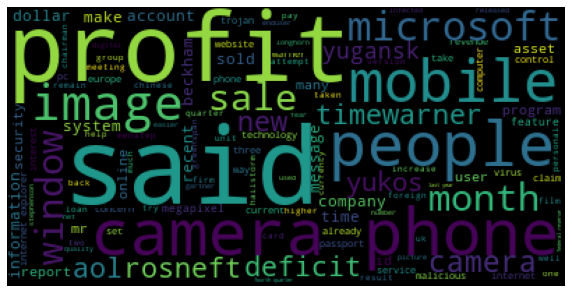

<Figure size 360x216 with 0 Axes>

In [37]:
plt.rcParams["figure.figsize"] = (10,8)
text = data['Texts'].values 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(5,3))
plt.show()


From the above worcloud we can see that:



*   **Said**, **Profit**, **Camera**, **Phone**, **Window**, **People**, **Image**, **Microsoft**, **Sale** are the most important words in this article.





In [39]:
def words_count(data):
  count = []
  word = [] 
  all_words = ' '.join(data['Texts']).split()
  for i in set(all_words):
    word.append(i)
    count.append(all_words.count(i))
  word_count_df = pd.DataFrame({'Words': word,'Count':count},columns=['Words','Count']).sort_values(by='Count', ascending=False)
  return word_count_df

In [40]:
word_count = words_count(data)
word_count[0:15]

,Words,Count
13834,said,7253
1748,mr,3045
4162,year,2830
17048,would,2577
27017,also,2156
1868,people,2044
1100,u,2000
29107,new,1970
16103,one,1809
26681,could,1510


In [ ]:
import plotly.express as px
px.bar(word_count[0:50],x = 'Words',y= 'Count',title='Words VS Frequency graph')
#plt.title('Words VS Frequency graph',size=15)

## **Model Building**

## hierarchical clustering

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [69]:
tfidf = TfidfVectorizer(decode_error='ignore', lowercase = True, min_df=2)


In [72]:
dtm=tfidf.fit_transform(data['Texts'])

In [73]:
dtm.shape

(2225, 17131)

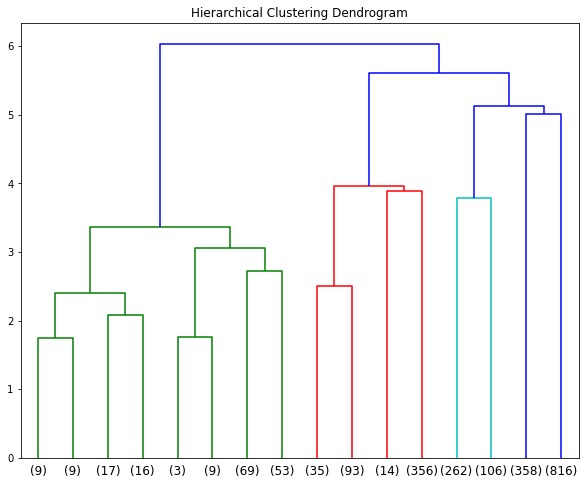

In [93]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = dtm.toarray()

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
#plt.xlabel("Number of points in node")
plt.show()

From the above dendogram we can see that, we have successfully got 5 different clusters.

In [81]:

clustering = AgglomerativeClustering(n_clusters=5).fit(X)
clustering
AgglomerativeClustering()


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [82]:
pd.Series(clustering.labels_).unique()

array([0, 3, 4, 2, 1])

In [85]:
df=pd.DataFrame(dtm)

In [43]:
import spacy
nlp = spacy.load("en_core_web_md", disable=['parser', 'ner'])

In [44]:
# Tokenizing the words.

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [45]:
text_list=data['Texts'].tolist()
print(text_list[1])
tokenized_texts = lemmatization(text_list)
print(tokenized_texts[1])

ad sale boost time warner profit quarterly profit u medium giant timewarner jumped 76 113bn £600m three month december 639m yearearlier firm one biggest investor google benefited sale highspeed internet connection higher advert sale timewarner said fourth quarter sale rose 2 111bn 109bn profit buoyed oneoff gain offset profit dip warner bros le user aol time warner said friday owns 8 searchengine google internet business aol mixed fortune lost 464000 subscriber fourth quarter profit lower preceding three quarter however company said aols underlying profit exceptional item rose 8 back stronger internet advertising revenue hope increase subscriber offering online service free timewarner internet customer try sign aols existing customer highspeed broadband timewarner also restate 2000 2003 result following probe u security exchange commission sec close concluding time warner fourth quarter profit slightly better analyst expectation film division saw profit slump 27 284m helped boxoffice f

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_texts)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_texts]

In [ ]:
# Creating the object for LDA model using gensim library
import gensim
from gensim import models
LDA = gensim.models.ldamodel.LdaModel

In [ ]:
# Build LDA model
# Taking Number of topics=10
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [ ]:
len(doc_term_matrix)

2225

In [ ]:
# Print 10 topics with the weightage of words.
lda_model.print_topics()

[(0,
  '0.017*"people" + 0.015*"government" + 0.014*"election" + 0.009*"labour" + 0.008*"tax" + 0.008*"year" + 0.008*"party" + 0.008*"public" + 0.008*"gamer" + 0.007*"leader"'),
 (1,
  '0.038*"phone" + 0.031*"people" + 0.030*"mobile" + 0.025*"service" + 0.014*"technology" + 0.014*"broadband" + 0.011*"pc" + 0.009*"number" + 0.009*"network" + 0.009*"call"'),
 (2,
  '0.019*"club" + 0.016*"window" + 0.016*"malicious" + 0.015*"year" + 0.012*"new" + 0.011*"battery" + 0.010*"last" + 0.010*"audio" + 0.009*"record" + 0.008*"vehicle"'),
 (3,
  '0.026*"year" + 0.016*"market" + 0.016*"company" + 0.014*"price" + 0.012*"firm" + 0.011*"growth" + 0.011*"rate" + 0.011*"sale" + 0.010*"economy" + 0.010*"last"'),
 (4,
  '0.033*"site" + 0.031*"attack" + 0.029*"net" + 0.028*"email" + 0.020*"spam" + 0.018*"website" + 0.016*"message" + 0.016*"machine" + 0.013*"traffic" + 0.012*"domain"'),
 (5,
  '0.028*"game" + 0.021*"player" + 0.016*"time" + 0.015*"good" + 0.014*"last" + 0.013*"team" + 0.013*"second" + 0.012

In [ ]:
# Visualize the topics
import pyLDAvis
from pyLDAvis import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.060102 -0.076693       1        1  17.929908
3     -0.026294 -0.044366       2        1  16.602599
8     -0.022038 -0.202026       3        1  11.803206
7     -0.152325  0.143558       4        1  10.389443
5     -0.179502  0.105199       5        1   9.943146
9      0.005257  0.197008       6        1   8.887497
6      0.200349  0.073242       7        1   8.573273
1      0.168496  0.056876       8        1   8.328276
2     -0.141959 -0.165225       9        1   4.160318
4      0.208117 -0.087574      10        1   3.382334, topic_info=        Term         Freq        Total Category  logprob  loglift
1285    game  1291.000000  1291.000000  Default  30.0000  30.0000
946    phone   666.000000   666.000000  Default  29.0000  29.0000
417   people  1958.000000  1958.000000  Default  28.0000  28.0000
319   mobile   523.000000   523.000000  Default  27.0000  27.0000
388   player   807.000000   807.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
164     many    62.259830   783.653630  Topic10  -4.7381   0.8540
333     user    52.574643   517.538188  Topic10  -4.9071   1.0998
396      web    37.807392   176.644091  Topic10  -5.2369   1.8450
417   people    43.388327  1958.315100  Topic10  -5.0992  -0.4230
571     work    39.853446   481.700500  Topic10  -5.1842   0.8945

[674 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1043      3  0.111888  access
1043      7  0.191142  access
1043      8  0.694638  access
0         1  0.139905  action
0         3  0.573896  action
...     ...       ...     ...
190       5  0.089165    year
190       6  0.090006    year
190       7  0.015141    year
190       8  0.050471    year
190       9  0.054676    year

[1394 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 9, 8, 6, 10, 7, 2, 3, 5])

From the above we can see that, we getting maximum **overlap** between the different topics when number of topics is 10.

So, we need to optimise our model to reduce the overlap between the topics.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.370060713636311

Coherence Score:  0.5263763911501756


Model having coherence score close to 1 is the best model for the topic modelling.

In [ ]:
import pyLDAvis
import pyLDAvis.gensim 
import gensim

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Min number of topics=2
# Max number of topics=20

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_texts, start=2, limit=20, step=1)


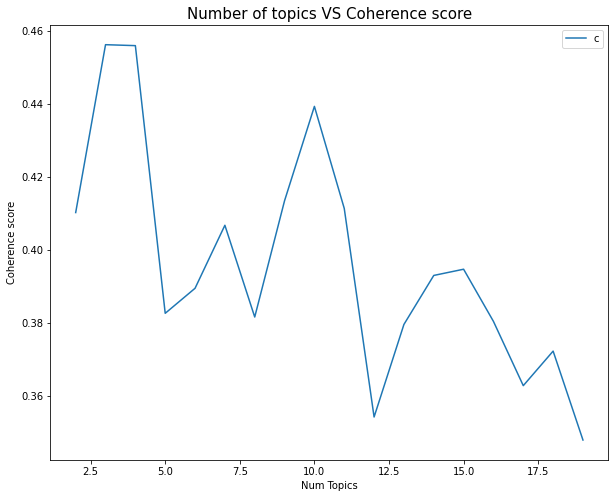

In [ ]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title('Number of topics VS Coherence score',size=15)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

From the above graph we can clearly see that topic number=4 has the highest coherence score.


In [ ]:
# Print the coherence scores for various 
for m, cv in zip(x, coherence_values):
    print("Number Of Topics =", m, " has Coherence Value of", round(cv, 4))

Number Of Topics = 2  has Coherence Value of 0.4102
Number Of Topics = 3  has Coherence Value of 0.4561
Number Of Topics = 4  has Coherence Value of 0.4559
Number Of Topics = 5  has Coherence Value of 0.3826
Number Of Topics = 6  has Coherence Value of 0.3894
Number Of Topics = 7  has Coherence Value of 0.4067
Number Of Topics = 8  has Coherence Value of 0.3816
Number Of Topics = 9  has Coherence Value of 0.4134
Number Of Topics = 10  has Coherence Value of 0.4393
Number Of Topics = 11  has Coherence Value of 0.4113
Number Of Topics = 12  has Coherence Value of 0.3542
Number Of Topics = 13  has Coherence Value of 0.3795
Number Of Topics = 14  has Coherence Value of 0.393
Number Of Topics = 15  has Coherence Value of 0.3947
Number Of Topics = 16  has Coherence Value of 0.3804
Number Of Topics = 17  has Coherence Value of 0.3628
Number Of Topics = 18  has Coherence Value of 0.3722
Number Of Topics = 19  has Coherence Value of 0.3479


Number of topics=4 has the higest coherence score of 0.4559.

In [ ]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)


[(0,
  '0.015*"people" + 0.014*"music" + 0.013*"technology" + 0.010*"year" + 0.010*"player" + 0.009*"game" + 0.008*"service" + 0.008*"new" + 0.008*"mobile" + 0.007*"time"'),
 (1,
  '0.019*"people" + 0.010*"phone" + 0.009*"user" + 0.009*"system" + 0.008*"computer" + 0.008*"software" + 0.008*"firm" + 0.008*"net" + 0.007*"email" + 0.007*"service"'),
 (2,
  '0.021*"game" + 0.010*"user" + 0.009*"people" + 0.008*"phone" + 0.008*"firm" + 0.008*"mobile" + 0.007*"year" + 0.006*"market" + 0.006*"time" + 0.006*"pc"'),
 (3,
  '0.011*"new" + 0.011*"year" + 0.006*"time" + 0.006*"player" + 0.006*"price" + 0.006*"sale" + 0.006*"people" + 0.005*"last" + 0.005*"firm" + 0.005*"mini"')]

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.082562  0.030960       1        1  48.301927
1     -0.063914  0.045069       2        1  20.417079
0      0.002256 -0.054615       3        1  18.856472
2     -0.020905 -0.021413       4        1  12.424522, topic_info=            Term         Freq        Total Category  logprob  loglift
1285        game  1472.000000  1472.000000  Default  30.0000  30.0000
417       people  2231.000000  2231.000000  Default  29.0000  29.0000
99         music   980.000000   980.000000  Default  28.0000  28.0000
946        phone   960.000000   960.000000  Default  27.0000  27.0000
333         user   905.000000   905.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
281       number   117.106163   798.661384   Topic4  -5.4074   0.1656
224          new   148.172153  1820.446844   Topic4  -5.1721  -0.4230
330   technology   119.476263  1123.696531   Topic4  -5.3874  -0.1558
124          way   106.960844   795.691928   Topic4  -5.4980   0.0787
99         music    99.997591   980.941728   Topic4  -5.5653  -0.1979

[362 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
10421      1  0.990289    2d
9947       1  0.265928   3gp
9947       3  0.797785   3gp
1232       1  0.256834  able
1232       2  0.200542  able
...      ...       ...   ...
5912       3  0.764683     x
190        1  0.561858  year
190        2  0.145725  year
190        3  0.203068  year
190        4  0.089434  year

[848 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

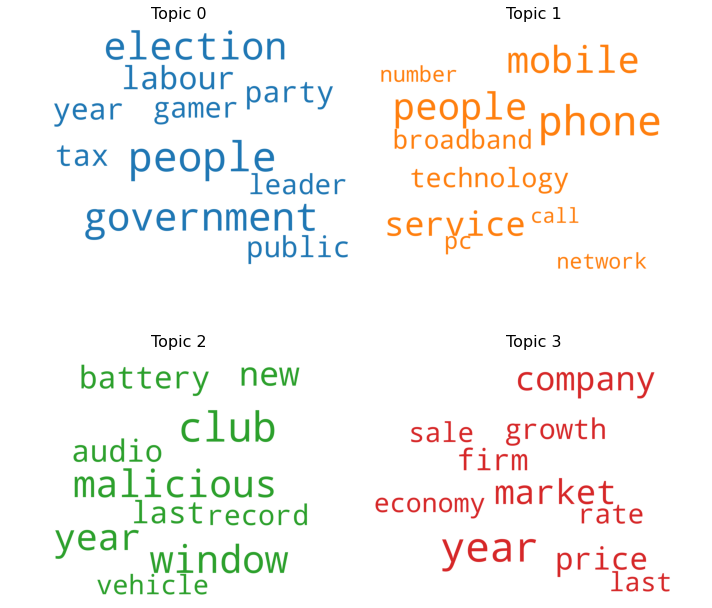

In [ ]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

From the above plots we can see the **top 10** words for the each topic.

In [ ]:
data_words=lemmatization(text_list)


In [ ]:
from gensim.utils import simple_preprocess

In [ ]:
# Build the bigram and trigram models
stop_words = set(stopwords.words("english"))
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams """
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out



/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



In [ ]:
data_ready = process_words(data_words)  # processed Text Data!

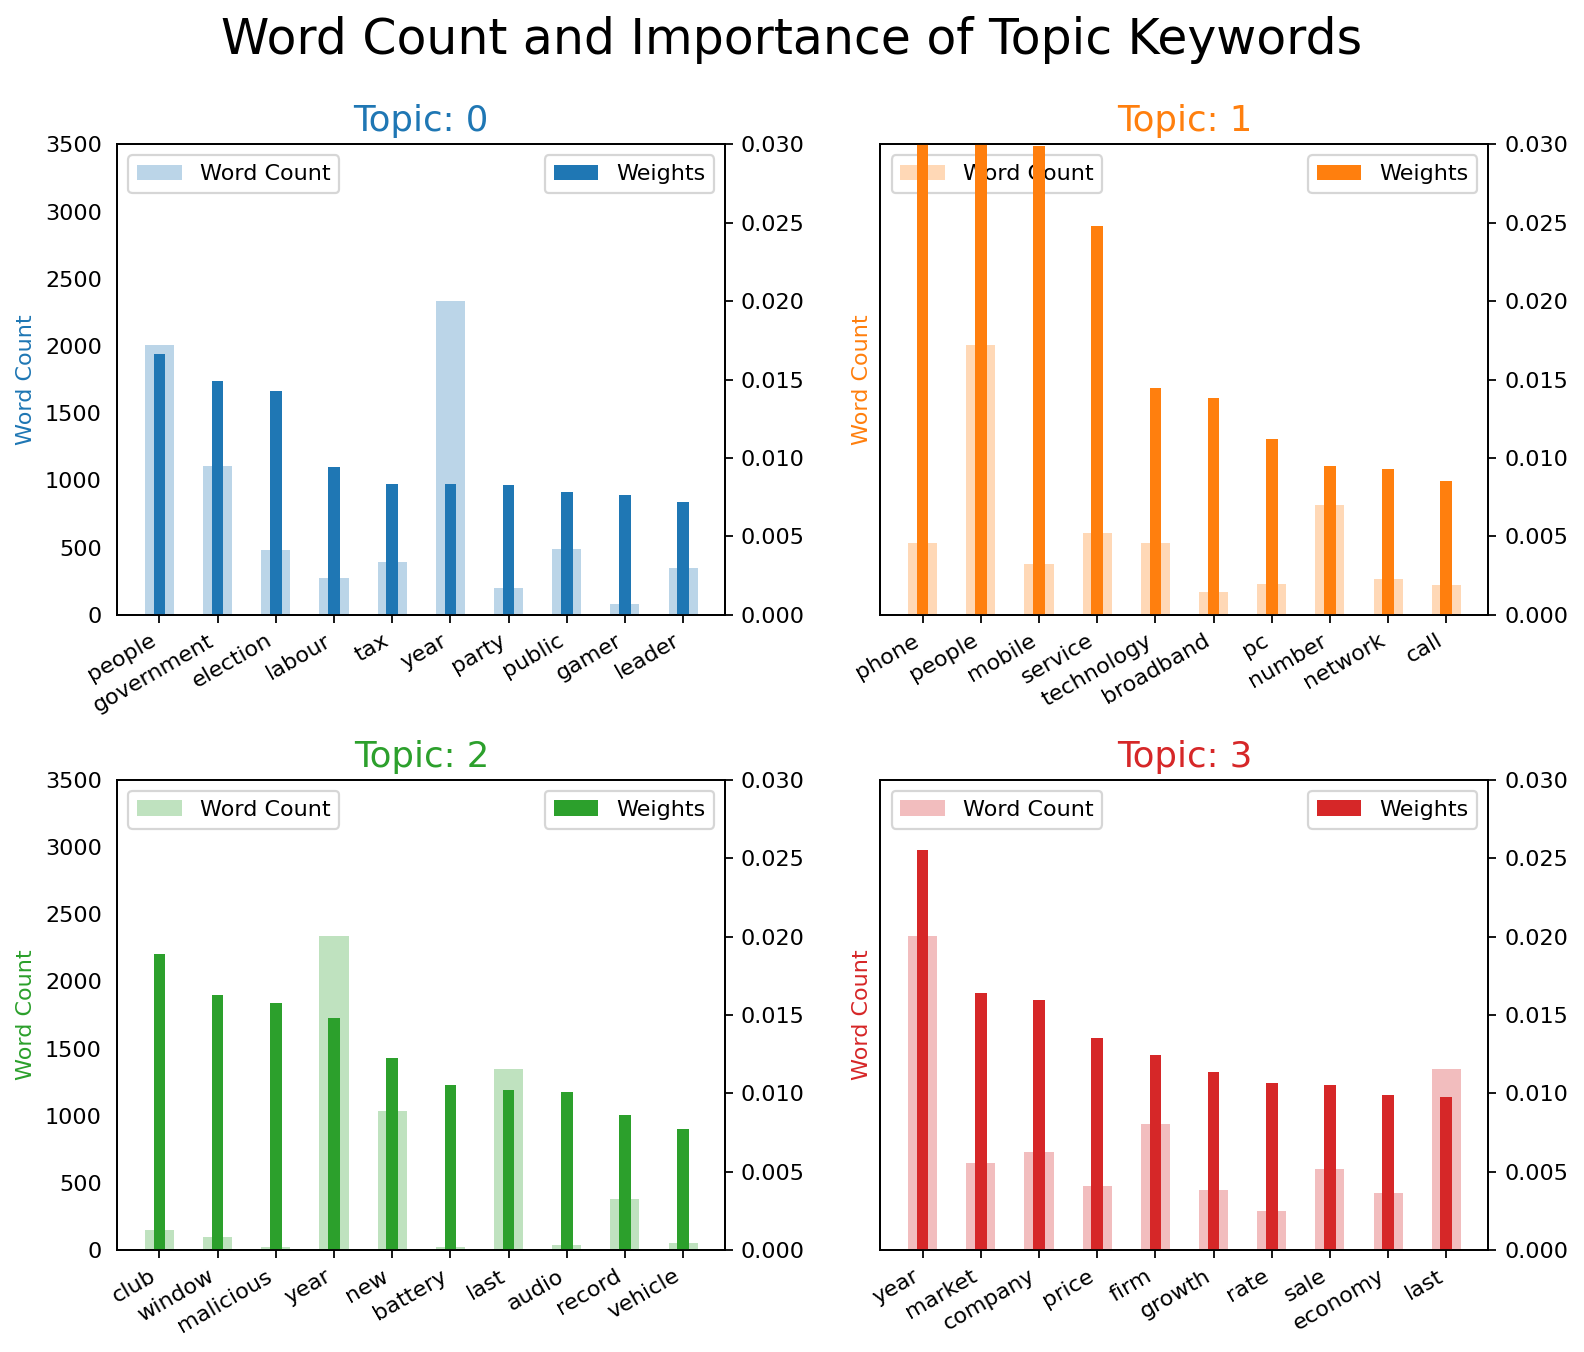

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
if data_ready is not None:
  data_flat = [w for w_list in data_ready for w in w_list]
  counter = Counter(data_flat)

  out = []
  for i, topic in topics:
      for word, weight in topic:
          out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(10,8), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## **Conclusion**